In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import string
from string import digits
import re
from sklearn.utils import shuffle
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Input, Dense,Embedding
from keras.models import Model,load_model
from keras.utils import plot_model
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import Tokenizer
from keras.models import model_from_json
import pickle as pkl
import numpy as np

In [ ]:
with open('The Quran Corpus.txt','r') as f:
  data = f.read()

In [ ]:
uncleaned_data_list = data.split('\n')

In [ ]:
len(uncleaned_data_list)

37417

In [ ]:
uncleaned_data_list = uncleaned_data_list[:37416]

In [ ]:
universal_translation_word = []
archaic_translation_word = []
cleaned_data_list = []
for word in uncleaned_data_list:
  universal_translation_word.append(word.split('\t')[:][0])
  archaic_translation_word.append(word.split('\t')[:][1]) #[:][1]

In [ ]:
len(universal_translation_word), len(archaic_translation_word)

(37416, 37416)

In [ ]:
language_data = pd.DataFrame(columns=['Universal_Translation','Archaic_Translatiion'])
language_data['Universal_Translation'] = universal_translation_word
language_data['Archaic_Translatiion'] = archaic_translation_word

In [ ]:
language_data.to_csv('language_data.csv', index=False)

In [ ]:
language_data = pd.read_csv('language_data.csv')

In [ ]:
language_data.head()

,Universal_Translation,Archaic_Translatiion
0,"In the name of Allah, the Entirely Merciful, t...","In the name of Allah, the Beneficent, the Merc..."
1,"In the name of Allah, the Entirely Merciful, t...","In the name of Allah, Most Gracious, Most Merc..."
2,"In the name of Allah, the Entirely Merciful, t...","In the name of Allah, the Beneficent, the Merc..."
3,"In the name of Allah, the Entirely Merciful, t...","In the Name of Allah, the Beneficent, the Merc..."
4,"In the name of Allah, the Entirely Merciful, t...","In the Name of Allah, the Most Beneficent, the..."


In [ ]:
language_data.tail()

,Universal_Translation,Archaic_Translatiion
37411,"From among the jinn and mankind.""",Among Jinns and among men.
37412,"From among the jinn and mankind.""",From among the jinn and the men.
37413,"From among the jinn and mankind.""",who induce temptation into the hearts of mankind.
37414,"From among the jinn and mankind.""","""Of jinns and men."""
37415,"From among the jinn and mankind.""",of jinn and men.'


In [ ]:

universal_translation_text = language_data['Universal_Translation'].values
archaic_translation_text = language_data['Archaic_Translatiion'].values



In [ ]:
universal_translation_text[0], archaic_translation_text[0]





('In the name of Allah, the Entirely Merciful, the Especially Merciful.',
 'In the name of Allah, the Beneficent, the Merciful.')

In [ ]:
len(universal_translation_text), len(archaic_translation_text)





(37416, 37416)

In [ ]:
universal_translation_text_ = [x.lower() for x in universal_translation_text]
archaic_translation_text_ = [x.lower() for x in archaic_translation_text]



In [ ]:
type(universal_translation_text_), type(archaic_translation_text_)

(list, list)

In [ ]:
universal_translation_text_ = [re.sub("'",'',x) for x in universal_translation_text_]
archaic_translation_text_ = [re.sub("'",'',x) for x in archaic_translation_text_]

In [ ]:
def remove_punc(text_list):
  table = str.maketrans('', '', string.punctuation)
  removed_punc_text = []
  for sent in text_list:
    sentance = [w.translate(table) for w in sent.split(' ')]
    removed_punc_text.append(' '.join(sentance))
  return removed_punc_text
universal_translation_text_= remove_punc(universal_translation_text_)
archaic_translation_text_ = remove_punc(archaic_translation_text_)

In [ ]:

remove_digits = str.maketrans('', '', digits)
removed_digits_text = []
for sent in archaic_translation_text_:
  sentence = [w.translate(remove_digits) for w in sent.split(' ')]
  removed_digits_text.append(' '.join(sentence))
archaic_translation_text_ = removed_digits_text

# removing the digits from the universal translation 
universal_translation_text_ = [re.sub("[0123456789]","",x) for x in universal_translation_text_]
universal_translation_text_ = [re.sub("[\u200d]","",x) for x in universal_translation_text_]

# removing the stating and ending whitespaces
archaic_translation_text_ = [x.strip() for x in archaic_translation_text_]
universal_translation_text_ = [x.strip() for x in universal_translation_text_]

In [ ]:
archaic_translation_text_[0]

'in the name of allah the beneficent the merciful'

In [ ]:
universal_translation_text_ = [x.strip() for x in universal_translation_text_]
archaic_translation_text_ = [x.strip() for x in archaic_translation_text_]

In [ ]:
universal_translation_text_ = ["start " + x + " end" for x in universal_translation_text_]

In [ ]:
archaic_translation_text_[0], universal_translation_text_[0]

('in the name of allah the beneficent the merciful',
 'start in the name of allah the entirely merciful the especially merciful end')

In [ ]:

len(archaic_translation_text_),len(universal_translation_text_)

(37416, 37416)

In [ ]:
Y = universal_translation_text_
X = archaic_translation_text_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.1)
len(X_train),len(y_train), len(X_test), len(y_test)

(33674, 33674, 3742, 3742)

In [ ]:
X[0], Y[0]

('in the name of allah the beneficent the merciful',
 'start in the name of allah the entirely merciful the especially merciful end')

In [ ]:
X_train[0], y_train[0]

('we know what the earth diminishes of them with us is a book recording',
 'start we know what the earth diminishes of them and with us is a retaining record end')

In [ ]:
# preparing data for the word embedding
def Max_length(data):
  max_length_ = max([len(x.split(' ')) for x in data])
  return max_length_

#Training data
max_length_archaic_translation = Max_length(X_train)
max_length_universal_translation = Max_length(y_train)

#Test data
max_length_archaic_translation_test = Max_length(X_test)
max_length_universal_translation_test = Max_length(y_test)

In [ ]:
max_length_archaic_translation,max_length_universal_translation,max_length_archaic_translation_test, max_length_universal_translation_test

(321, 259, 199, 164)

In [ ]:
def tokenizer_(text_data):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(text_data)
  return tokenizer

tokenizer_input = tokenizer_(X_train)
vocab_size_input = len(tokenizer_input.word_index) + 1
tokenizer_target = tokenizer_(y_train)
vocab_size_target = len(tokenizer_target.word_index) + 1

In [ ]:
with open('NMT_data.pkl','wb') as f:
  pkl.dump([X_train, y_train, X_test, y_test],f)

In [ ]:
with open('tokenizer_input.pkl','wb') as f:
  pkl.dump(tokenizer_input,f)

with open('tokenizer_target.pkl','wb') as f:
  pkl.dump(tokenizer_target,f)
pkl.dump(tokenizer_input, open('tokenizer_input.pkl', 'wb'))
pkl.dump(tokenizer_target, open('tokenizer_target.pkl', 'wb'))

In [ ]:
vocab_size_input,vocab_size_target

(12746, 5278)

In [ ]:
def generator_batch(X= X_train,Y=y_train, batch_size=128):
  while True:
    for j in range(0, len(X), batch_size):
      encoder_data_input = np.zeros((batch_size,max_length_archaic_translation),dtype='float32') 
      decoder_data_input = np.zeros((batch_size,max_length_universal_translation),dtype='float32') 
      decoder_target_input = np.zeros((batch_size,max_length_universal_translation,vocab_size_target),dtype='float32') # 3d array one hot encoder decoder target data
      for i, (input_text,target_text) in enumerate(zip(X[j:j+batch_size],Y[j:j+batch_size])):
        for t, word in enumerate(input_text.split()):
          encoder_data_input[i,t] = tokenizer_input.word_index[word] # Here we are storing the encoder 
                                                                     #seq in row here padding is done automaticaly as 
                                                                     #we have defined col as max_length
        for t, word in enumerate(target_text.split()):
          # if word == 'START_':
          #   word = 'start'
          # elif word == 'END_':
          #   word = 'end'
          decoder_data_input[i,t] = tokenizer_target.word_index[word] # same for the decoder sequence
          if t>0:
            decoder_target_input[i,t-1,tokenizer_target.word_index[word]] = 1 #target is one timestep ahead of decoder input because it does not have 'start tag'
      # print(encoder_data_input.shape())
      yield ([encoder_data_input,decoder_data_input],decoder_target_input)

In [ ]:
latent_dim = 500
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None,),name="encoder_inputs")
emb_layer_encoder = Embedding(vocab_size_input,latent_dim, mask_zero=True)(encoder_inputs)
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(emb_layer_encoder)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,),name="decoder_inputs")
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
emb_layer_decoder = Embedding(vocab_size_target,latent_dim, mask_zero=True)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(emb_layer_decoder, initial_state=encoder_states)
decoder_dense = Dense(vocab_size_target, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_inputs (InputLayer)     [(None, None)]       0                                            
__________________________________________________________________________________________________
decoder_inputs (InputLayer)     [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 500)    6373000     encoder_inputs[0][0]             
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 500)    2639000     decoder_inputs[0][0]             
______________________________________________________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

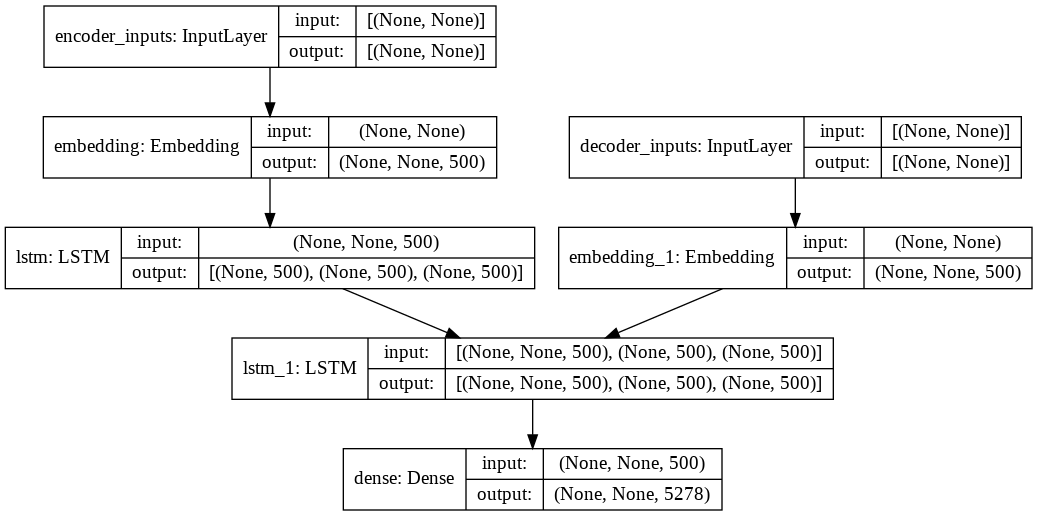

In [ ]:
plot_model(model, to_file='train_model.png', show_shapes=True)

In [ ]:
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 128
epochs = 550

In [ ]:
model.fit_generator(generator = generator_batch(X_train, y_train, batch_size = batch_size),
                    steps_per_epoch = train_samples//batch_size,
                    epochs=epochs)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/550
263/263 [==============================] - 132s 422ms/step - loss: 0.6256 - accuracy: 0.0822
Epoch 2/550
263/263 [==============================] - 113s 426ms/step - loss: 0.4388 - accuracy: 0.2079
Epoch 3/550
263/263 [==============================] - 113s 428ms/step - loss: 0.3852 - accuracy: 0.2619
Epoch 4/550
263/263 [==============================] - 113s 430ms/step - loss: 0.3428 - accuracy: 0.3150
Epoch 5/550
263/263 [==============================] - 114s 432ms/step - loss: 0.3067 - accuracy: 0.3631
Epoch 6/550
263/263 [==============================] - 112s 426ms/step - loss: 0.2749 - accuracy: 0.4073
Epoch 7/550
263/263 [==============================] - 112s 426ms/step - loss: 0.2471 - accuracy: 0.4500
Epoch 8/550
263/263 [==============================] - 112s 425ms/step - loss: 0.2224 - accuracy: 0.4909
Epoch 9/550
263/263 [==============================] - 112s 427ms/step - loss: 0.2005 - accuracy: 0.5306
Epoch 10/550
263/263 [==============================] -

In [ ]:
model_json = model.to_json()
with open("model_2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_weight_5.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# loading the model architecture and asigning the weights
json_file = open('model_2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_loaded = model_from_json(loaded_model_json)
# load weights into new model
model_loaded.load_weights("model_weight_5.h5")

In [ ]:
latent_dim = 500
#inference encoder
encoder_inputs_inf = model_loaded.input[0] #Trained encoder input layer
encoder_outputs_inf, inf_state_h, inf_state_c = model_loaded.layers[4].output # retoring the encoder lstm output and states
encoder_inf_states = [inf_state_h,inf_state_c]
encoder_model = Model(encoder_inputs_inf,encoder_inf_states)

In [ ]:
#inference decoder
# The following tensor will store the state of the previous timestep in the "starting the encoder final time step"
decoder_state_h_input = Input(shape=(latent_dim,)) #becase during training we have set the lstm unit to be of 50
decoder_state_c_input = Input(shape=(latent_dim,))
decoder_state_input = [decoder_state_h_input,decoder_state_c_input]

# # inference decoder input
decoder_input_inf = model_loaded.input[1] #Trained decoder input layer
# decoder_input_inf._name='decoder_input'
decoder_emb_inf = model_loaded.layers[3](decoder_input_inf)
decoder_lstm_inf = model_loaded.layers[5]
decoder_output_inf, decoder_state_h_inf, decoder_state_c_inf = decoder_lstm_inf(decoder_emb_inf, initial_state =decoder_state_input)
decoder_state_inf = [decoder_state_h_inf,decoder_state_c_inf]
#inference dense layer
dense_inf = model_loaded.layers[6]
decoder_output_final = dense_inf(decoder_output_inf)# A dense softmax layer to generate prob dist. over the target vocabulary

decoder_model = Model([decoder_input_inf]+decoder_state_input,[decoder_output_final]+decoder_state_inf)

In [ ]:
with open('NMT_data.pkl','rb') as f:
  X_train, y_train, X_test, y_test = pkl.load(f)

In [ ]:
with open('tokenizer_input.pkl','rb') as f:
  tokenizer_input = pkl.load(f)
with open('tokenizer_target.pkl','rb') as f:
  tokenizer_target = pkl.load(f)
# Creating the reverse mapping to get the word from the index in the sequence
reverse_word_map_input = dict(map(reversed, tokenizer_input.word_index.items()))
reverse_word_map_target = dict(map(reversed, tokenizer_target.word_index.items()))

In [ ]:
# Code to predct the input sentences translation
def decode_seq(input_seq):
  # print("input_seq=>",input_seq)
  state_values_encoder = encoder_model.predict(input_seq)
  # intialize the target seq with start tag
  target_seq = np.zeros((1,1))
  target_seq[0, 0] = tokenizer_target.word_index['start']
  # print("target_seq:=>",target_seq)
  stop_condition = False
  decoder_sentance = ''
  # print("Beforee the while loop")
  while not stop_condition:
    sample_word , decoder_h,decoder_c= decoder_model.predict([target_seq] + state_values_encoder)
    # print("sample_word: =>",sample_word)
    sample_word_index = np.argmax(sample_word[0,-1,:])
    # print("sample_word_index: ",sample_word_index)
    decoder_word = reverse_word_map_target[sample_word_index]
    decoder_sentance += ' '+ decoder_word
    # print("decoded word:=>",decoder_word)
    # print(len(decoder_sentance))
    # print("len(decoder_sentance) > 70: ",len(decoder_sentance) > 70)
    # print('decoder_word == "end"',decoder_word == 'end')
    # print(decoder_word == 'end' or len(decoder_sentance) > 70)
    # stop condition for the while loop
    if (decoder_word == 'end' or 
        len(decoder_sentance) > 2000):
        stop_condition = True
        # print("from if condition")
    # target_seq = np.zeros((1,1))
    target_seq[0, 0] = sample_word_index
    # print(target_seq)
    state_values_encoder = [decoder_h,decoder_c]
  return decoder_sentance

In [ ]:
!pip install jellyfish

In [ ]:
!pip install textdistance

In [ ]:
!pip install strsimpy

     |████████████████████████████████| 51kB 3.2MB/s 


In [ ]:
import re
import jellyfish
import scipy
import textdistance
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nltk.translate import bleu
from strsimpy.normalized_levenshtein import NormalizedLevenshtein
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from difflib import SequenceMatcher
from nltk.translate.bleu_score import SmoothingFunction
count_vect = CountVectorizer()
cc = SmoothingFunction() 
smoothie = SmoothingFunction().method4
sum=0
sum1=0
sum2=0
sum3=0
sum4=0
sum5=0
sum6=0
sum7=0
performance=0
performance1=0
performance2=0
performance3=0
performance4=0
performance5=0
performance6=0
performance7=0
normalized_levenshtein = NormalizedLevenshtein()
dct = {'deviant':'devaint (departing from usual or accepted standards)',
       'cessation':'end',
    'conspicuous':'visible',
    'repelling':'repelling (turning it back)',
    'calamity':'disaster',
    'merchandise':'goods',
    'impassioned':'imapassioned (filled with or showing great emotion)',
    'coercion':'force',
    'despaired':'lost hope',
    'adversity':'disaster',
    'exultant':'thrilled',
    'adorments':'glitter',
    'unto':'to',
    'depositories':'depositories (a place where things can be stored)',
    'anchorage':'anchorage (a place where the boat is or can be anchored)',
    'disembark':'disembark (to leave a ship after a journey)',
    'forelock':'forelock (a piece of hair that grows or falls over the forehead)',
    'obstinate':'aggressive',
    'tyrant':'cruel ruler',
    'disquieting':'alarming',
    'hamstrung':'killed',
    'shriek':'shriek (a piercing cry or blast from the sky)',
    'apprehension':'harm',
    'availed':'profited',
    'bestowal':'gift',
    'undiminished':'fully',
    'impending':'impending (near)',
    'tyranny':'oppression',
    'enmity':'extreme hatred',
    'ambush':'attack',
    'besiege':'surround',
    'kinship':'relationship',
    'striven':'striven (make great efforts to achieve something)',
    'commerce':'trade',
    'flanks':'flanks (the side of a persons or animals body between the ribs and the hips)',
    'tranquility':'calm',
    'apprehensive':'anxious',
    'vanities':'idle talks',
    'stingy':'not generous',
    'bedouins':'bedouins (a member of an Arab people living in or near the desert)',
    'invocations':'prayers',
    'afflicted':'suffered',
    'inflictions':'imposed',
    'wherein':'in which',
    'therewith':'therewith (soon or immediately after that)',
    'hostilities':'hostilities (hatred)',
    'hostility':'hostility (hatred)',
    'obstruct':'block',
    'pledge':'pledge(word of honor)',
    'inflicts':'imposes',
    'massacre':'massacre (murder/slaughter of people) ',
    'massacred':'massacred (murder/slaughter of people)',
    'commodities':'assets',
    'debased':'wicked',
    'eminent':'eminent (very important)',
    'defilement':'degradation',
    'insolent':'arrogant',
    'insolently':'arrogantly',
    'prone':'prone (lying flat)',
    'afflict':'suffer',
    'serpent':'snake',
    'bewitched':'bewitched (to affect by witchcraft)',
    'subjugators':'winners',
    'tablets':'tablets (a flat slab, intended to bear writtings)',
    'heedless':'careless',
    'inscription':'inscription (a historical, religious, or other record cut, impressed, painted, or written on stone, brick, metal, or other hard surface)',
    'absolved':'exempt',
    'contrived':'manipulated',
    'equate':'regard',
    'thereform':'from that place',
    'deities':'Gods',
    'intercessor':'mediator',
    'intercessors':'mediators',
    'finality':'finality (the fact of being final)',
    'appraisal':'assessment',
    'prohibited':'forbid',
    'digress':'digress (to turn aside)',
    'tyrannical':'brutal',
    'thereto':'to that',
    'expiation':'expiation (to make amends)',
    'perjury':'perjury (lying under oath)',
    'sanctity':'holiness',
    'substitute':'alternative',
    'devour':'swallow',
    'detriment':'disadvantage',
    'ordains':'establish',
    'ordained':'established',
    'decree':'legal order',
    'decreed':'mandated',
    'chastity':'purity',
    'affliction':'suffering',
    'arbitrator':'arbitrator (settler of a dispute)',
    'reconciliation':'harmony',
    'boastful':'bragging',
    'stinginess':'extreme greed',
    'fabricated':'constructed',
    'far astray':'far away',
    'accommodation':'compromise',
    'admonish':'advise',
    'attainment':'achievement',
    'lofty':'high',
    'disposer':'giver',
    'intercedes':'interfere',
    'emigrate':'emigrate (abandon their homes)',
    'wherein':'in which',
    'acquisitions':'profits',
    'conferred':'awarded',
    'incumbent':'necessary',
    'prostrated':'bowed',
    'slander':'falsehood',
    'recompensed':'repayed',
    'contempt':'disrespect',
    'evasion':'avoidance',
    'his abundance':'his rewards',
    'wavering':'swaying',
    'pardoning':'forgiving',
    'pardoned':'forgiven',
    'discriminate':'differentiate',
    'solemn':'dignified',
    'avert':'turn away',
    'desist':'desist (stop doing something)',
    'disdained':'disrespected',
    'emigrant':'emigrant (one who leaves his own country)',
    'manifest': 'clear',
    'attributable': '[attributable (considered impossible)]',
    'martyrdom': 'martyrdom (killed in the cause of God)',
    'steadfast': 'firm',
    'an immorality': 'a crime',
    'persevere': 'work hard',
    'stationed': 'firm',
    'uninhibited': 'unrestrained',
    'martyred': 'martyred (killed in the cause of God)',
    'distress': 'pain',
    'disputing': 'arguing',
    'refuge': 'place to hide',
    'afflicted': 'depressed',
    'decree determined': 'term appointed',
    'thereby': 'by that',
    'tidings': 'news',
    'reinforce': 'increase',
    'hardships': 'severe suffering',
    'intimates': 'close friends',
    'hasten': 'hurry',
    'prostrating': 'bowing',
    'attain': 'achieve',
    'repent': 'feel remorse',
    'abiding': 'living',
    'their recompense': 'their reward',
    'pious': 'devoted',
    'alter': 'change',
    'oaths': 'promises',
    'falsehood': 'untruthfulness',
    'faction': 'group',
    'inclining': 'favoring',
    'equitable': 'shared',
    'invoke': 'call on',
    'supplicate': 'beg',
    'hereafter': 'life after death',
    'leaper': 'leper (A person affected with leprosy disease)',
    'disputed': 'argued',
    'abstaining': 'abstaining (to hold oneself back voluntarily)',
    'expelled': 'rejected',
    'prudence': 'fear',
    'sovereignty': 'power',
    'assemble': 'gather',
    'deluded': 'fooled',
    'arbitrate': 'achieve settlement',
    'swift': 'very fast',
    'heaped-up': 'stacked',
    'penalty': 'punishment',
    'bestower': 'granter',
    'scribe': 'scribe (the one who makes a written copy professionally)',
    'forbearing': 'tolerant',
    'animosity': 'extreme hatred',
    'deviation' :'change',
    'ridicule': 'make fun of',
    'ordinances': 'law',
    'bequeather': 'will',
    'bequest': 'will',
    'testimony': 'testimony (declaration about truth)',
    'usury': 'lending money at high interest',
    'admonition': 'caution',
    'kursi': 'kursi (Chair)',
    'deity': 'god',
    'kingship': 'nobility',
    'acquainted': 'aware',
    'transgress': 'does wrong',
    'alleviation': 'relief',
    'retribution': 'compensation',
    'prescirbed': 'recommended',
    'dissension': 'disagreement',
    'reprieved': 'relief of blame',
    'exalted': 'praised',
    'all encompassing': 'All-Sufficient',
    'dominion': 'authority',
    'abrogate': 'put an end',
    'bounty': 'gift',
    'enjoins': 'commands',
    'wrath': 'extreme anger',
    'wretched': 'terrible',
    'resurrection': 'resurrection (Awakening from the dead)',
    'resurrected':'resurrected (Awakened from the dead)',
    'aggression': 'attack',
    'evicting': 'throwing out',
    'evict': 'throw out',
    'enjoining': 'commanding',
    'woe': 'suffering',
    'unlettered': 'vulgar',
    'covet': 'wish',
    'concealing': 'hiding',
    'irrigate': 'water',
    'plow': 'dig',
    'median between that': '(it is) between the two conditions',
    'do you take us in ridicule?': 'are you mocking us?',
    'despised': 'I look down upon you',
    'transgressed': 'spread sin',
    'transgressing': 'wrong-doers',
    'gushed':'poured out',
    'aided': 'helped',
    'intercession': 'appeal',
    'suffice': 'be enough',
    'righteousness': 'goodness',
    'discord': 'disharmony',
    'ally': 'protector',
    'deviation': 'change',
     '<end>': ' ',
     'discord': 'disharmony',
     'forsake': 'abandon',
     'sovereign': 'ruler',
     'recompense': 'Judgement',
     'bestowed': 'granted',
     'evoked': 'awaken',
     'astray':'lost',
    'transgressions':'wrong-doings',
    'kindled': 'start',
    'illuminated': 'lit up',
    'dread': 'fear',
    'is encompassing of': 'has surrounded',
    'competent': 'capable',
    'attribute': 'assign',
    'abide': 'live',
    'eternally': 'forever',
    'defiantly': '',
    'covenant': 'agreement',
    'sever': 'to cut off',
    'santify': 'purify',
    'prostrate': 'bow',
    'therein': 'in there',
    'conceal': 'hide',
    'scorching':'very hot',
    'discern':'observe',
    'foliage':'foliage (plant leaves collectively)',
    'enumerate':'list',
    'excretion':'excretion (a process in which metabolic waste is eliminated from an organism)',
    'palatable':'palatable (pleasant to taste)',
    'appease':'make concessions',
    'envelopment':'utmost degree',
    'probed':'examined',
    'censured':'censured (severe criticism)',
    'insolvent':'broke',
    'exultantly':'happily',
    'banished':'expelled',
    'sublimity':'dignity',
    'aversion':'dislike',
    'meridian':'meridian (a great circle of the earth passing through the poles and any given point on the earths surface)',
    'deviance':'deviance (abnormality)',
    'murky':'unclear',
    'scalds':'burns',
    'fatigue':'tiredness',
    'supplement':'option',
    'supplication':'supplication (an act of asking earnestlt or humbly)',
    'adhere':'hold fast',
    'unchaste':'shameless',
    'abstention':'restrain',
    'invocation':'calling',
    'insolence':'arrogance',
    'inevitably':'unavoidably',
    'atrocious':'horrifyingly wicked',
    'slacken':'slacken (become less active)',
    'manna':'manna (the food miraculously supllied to the Israelities in the wilderness)',
    'hastened':'hurried',
    'o':'', #'o (o - used before a name in direct address)',
    'splendor':'beauty',
    'heedlessness':'careless',
    'thereupon':'therefore',
    'convulsion':'earthquake',
    'synagogues':'synagogues (a place of assembly (temple))',
    'monasteries':'monasteries (a building occupied by monks living under religious vows)',
    'tyrannized':'oppressed',
    'servitude':'servitude (the state of being a slave)',
    'outstrip':'overtake',
    'incitements':'incitements (provoking unlawful behaviour)',
    'fornicator':'fornicator (a person who has sex with someone who they are not married to)',
    'chaste':'chaste (to stay away from sexual intercourse)',
    'emancipation':'freedom',
    'compulsion':'compulsion (a very strong desire to do something)',
    'adhering':'adhering (to hold fast)',
    'sparingly':'cautiously',
    'tyrants':'cruel rulers',
    'kindred':'family and tribe',
    'haughtiness':'scronful arrogance',
    'haughty':'scornfully arrogant',
    'amending':'amending(to alter)',
    'amenders':'amenders (those who can alter)',
    'supremacy':'high rank',
    'sanctuary':'sanctuary (a holy place',
    'amply':'plenty',
    'replenished':'refill',
    'trodden':'trodden (walk in a specific way)',
    'adornment':'luxury',
    'enormity':'enormity (extreme scale)',
    'dignitaries':'dignitaries (high rank people)',
    'pliable':'flexible',
    'tamarisk':'tamarisk (flowering plant)',
    'benefactor':'benefactor (a person who gives some form of help to benefit a person)',
    'deluded':'fooled',
    'perish':'die',
    'extinguished':'furnished',
    'adorned':'furnished',
    'obliterated':'destroyed',
    'pelted':'struck',
    'contemptible':'humiliated',
    'scalding':'burning',
    'exertion':'labour',
    'explicit':'clear',
    'begotten':'begotten (brought into existence a child)',
    'lineage':'lineage (direct descent from an ancestor)',
    'depletion':'reduction',
    'purulence':'purulence (dirty wound discharges)',
    'reiterate':'reiterate (to do over repeatedly)',
    'skeptic':'skeptic (an attitude of doubt)',
    'skepticism':'skepticism (an attitude of doubt)',
    'exult':'rejoice',
    'decisive word':'word of judgement',
    'thereof':'of that',
    'enjoined':'urged',
    'thereby':'by that means',
    'subdued':'accomplished',
    'apportioned':'divided',
    'conjunction':'conjunction (state of being conjoined)',
    'denominations':'groups',
    'averse':'averse (feeling of dislike)',
    'transcribed':'transcribed (to make a written copy of)',
    'uff':'uff (an expression of distaste and irritation)',
    'oblivion':'oblivion (lack of consciousness)',
    'vengeance':'revenge',
    'allegiance':'loyalty',
    'imminent':'imminent (ready to take place)',
    'chauvinism':'chauvinism (extreme ignorance)',
    'stalks':'stalks (a part of a plant that supports another)',
    'defiance':'resistance',
    'inscribed':'inscribed (object marked with characters)',
    'parchment':'parchment (material made from animal skin)',
    'soothsayer':'fortune teller',
    'deterrence':'deterrrence (to prevent someone from doing something)',
    'sheaths':'enclosing',
    'brocade':'brocade (a rich fabric woven with a raised pattern, typically with gold or silver thread)',
    'pavilions':'in very large tents',
    'affluence':'wealth',
    'fortified':'armed',
    'propped':'leaned',
    'lodge them':'lodge them (let the women live (in iddat)',
    'dwell':'live',
    'retain':'keep',
    'dissolution':'formal release from guilt',
    'alienation':'isolation',
    'aloft':'up',
    'snout':'nose',
    'infirm':'weak',
    'cubits':'cubits (ancient measurement of length)',
    'aorta':'aorta (the main artery of the blood, supplying oxygenated blood to the circulatory system)',
    'supplicant':'supplicant (someone who prays to God)',
    'vainly':'unsuccessfully',
    'ascent':'rising upward',
    'grandeur':'glory',
    'arduous':'severe',
    'respite':'delay',
    'convulse':'shake violently',
    'scowled':'scowled (to contract the brow in an expression of displeasure)',
    'permanence':'permanence (the quality of being permanent)',
    'contorted':'deformed',
    'swaggering':'swaggering (overbearing self-connfidence)',
    'mirage':'mirage (an image, produced by very hot air, of something that seems to be far away but does not really exist)',
    'entwined':'thick',
    'pasture':'grass',
    'torrents':'sudden large amount',
    'herbage':'nutricious plants',
    'shrubbery':'group of shrubs',
    'derisive':'mocking',
    'jesting':'joking',
    'musk':'fragrance',
    'trench':'ditch',
    'slate':'rock',
    'stubble':'rotten rubbish',
    'discernment':'judgement',
    'polytheists':'polytheists (belief in many Gods)',
    'abyss':'bottomless pit'

}

def dictionary1(word):
     list=['abyss','polytheists','resurrected','discernment','unto','stubble','trench','slate','musk','o','derisive','jesting','torrents','herbage','shrubbery','pasture','mirage','entwined','permanence','contorted','swaggering','scowled','respite','convulse','arduous','grandeur','supplicant','ascent','vainly','infirm','cubits','aorta','snout','alienation','aloft','dissolution','lodge','retain','dwell','propped','fortified','affluence','sheaths','brocade','pavilions','deterrence','defiance','allegiance','imminent','chauvinism','offshoots','stalks','vengeance','oblivion','Uff','transcribed','thereby','subdued','apportioned','conjunction','denominations','averse','enjoined','thereof','decisive word','skeptic','skepticism','shackle','shackles','reiteration','depletion','purulence','pelted','contemptible','scalding','exertion','explicit','begotten','lineage','extinguished','adorned','obliterated','deluded','perish','tamarisk','benefactor','pliable','insolently','trodden','adornment','enormity','dignitaries','massacred','amply','replenished','countenance','intercessors','haughtiness','haughty','sanctuary','amending','amenders','supremacy','tyrant','kindred','adhering','sparingly','compulsion','emancipation','chaste','fornicator','servitude','outstrip','incitements','convulsion','synagogues','monasteries','tyrannized','heedlessness','thereupon','slacken','manna','hastened','splendor','supplication','adhere','unchaste','abstention','invocation','insolence','inevitably','atrocious','probed','censured','insolvent','exultantly','banished','sublimity','aversion','meridian','deviance','murky','scalds','fatigue','supplement','foliage','enumerate','excretion','palatable','envelopment','appease','scorching','discern','deviant','cessation','calamity','repelling','conspicuous','merchandise','impassioned','coercion','despaired','adversity','impending','undiminished','bestowal','availed','apprehension','shriek','hamstrung','disquieting','tyrant','obstinate','forelock','disembark','anchorage','depositories','adorments','exultant','tyranny','enmity','ambush','besiege','kinship','striven','commerce','flanks','tranquility','apprehensive','vanities','stingy','bedouins','invocations','afflicted','inflictions','wherein','therewith','hostilities','hostility','obstruct','pledge','inflicts','massacre','commodities','debased','eminent','defilement','insolent','prone','afflict','serpent','bewitched','subjugators','tablets','heedless','inscription','absolved','contrived','equate','thereform','deities','intercessor','finality','appraisal','prohibited', 'digress','tyrannical','thereto','expiation','perjury','sanctity','substitute','devour','detriment','ordains','ordained','decree','decreed','chastity','affliction','arbitrator','reconciliation','boastful','stinginess','fabricated','far astray','accommodation','admonish','attainment','lofty','disposer','intercedes', 'emigrate', 'wherein', 'acquisitions', 'conferred','incumbent', 'prostrated','slander','recompensed','contempt','evasion','his abundance','wavering','pardoning','pardoned','discriminate','solemn','avert','desist','disdained','emigrant','sovereign','recompense','bestowed','evoked','astray','transgressions','kindled','illuminated','dread','encompassing','competent','attribute','abide','eternally','defiantly','covenant','sever','sanctify','prostrate','therein','conceal','righteousness','suffice','intercession','aided','gushed','transgressions','transgressed','despised','ridicule','median','plow','irrigate','concealing','covet','unlettered','woe','enjoining','evict','evicting','aggression','resurrection','wretched','wrath','enjoins','bounty','abrogate','dominion','all encompassing','exalted','reprieved','dissension','prescribed','retribution','alleviation','transgresses','acquainted','kingship','deity','kursi','admonition','usury','testimony','bequest','bequeather','ordinances','deviation','animosity','forbearing','scribe','discord','bestower','penalty','heaped-up','swift','arbitrate','deluded','assemble','sovereignty','prudence','expelled','abstaining','disputed','leaper','hereafter','supplicate','invoke','equitable','inclining','faction','falsehood','oaths','alter','pious','abiding','repent','attain','prostrating','hasten','ally','intimates','hardship','ally','reinforce','tidings','thereby','decree','afflicted','refuge','disputing','distress','martyred','uninhibited','stationed','persevere','immorality','steadfast','martyrdom','forsake','attributable','booty','manifest']
     if word in list:
       print('Complex/Archaic Word:',word)

for i in range(3742):
  
  sentence = X_test[i]
  original_target = y_test[i]
  input_seq = tokenizer_input.texts_to_sequences([sentence])
  pad_sequence = pad_sequences(input_seq, maxlen= 200, padding='post')
  # print('input_sequence =>',input_seq)
  # print("pad_seq=>",pad_sequence)
  predicted_target = decode_seq(pad_sequence)
  print("Archaic Translation:",sentence)
  print("Expected Universal Translation:",original_target[6:-4])
  print("Predicted Universal Translation:",predicted_target[:-4])
  x=predicted_target[:-4]
  x1=x.split()
  for a in range(len(x1)): 
    dictionary1(x1[a]) 

  B1=str(predicted_target[:-4])
  B2=str(original_target[6:-4])
  C1=B1
  C2=B2
  q=predicted_target[:-4]
  s = SequenceMatcher(None, C1,C2)
  regex = re.compile(r'\b(' + '|'.join(map(re.escape, dct.keys())) + r')\b')
  print("Text Style Transfer Translation:",regex.sub(lambda match: dct[match.group(0)], q))
  a = set(C1.split())
  b = set(regex.sub(lambda match: dct[match.group(0)], q).split())
  jj=str(regex.sub(lambda match: dct[match.group(0)], q))
  similarity1 = float(len(a.intersection(b))*1.0/len(a.union(b)))
  document=[B1,jj]
  print('BLEUscore:',bleu([C1], C2, smoothing_function=smoothie))
  print('SequenceMatcher:',s.ratio())
  print('Jaro Distance:',jellyfish.jaro_similarity(C1, C2))
  #print('Match Rating Approach Comparison:',jellyfish.match_rating_comparison(C1, C2))
  print('Hamming Distance:',textdistance.hamming.normalized_similarity(C1,C2))
  print('Normalized Levenshtein:',normalized_levenshtein.similarity(C1, C2))
  print('Jaccard Similarity',similarity1)
  vectorizer = TfidfVectorizer()
  trsfm=vectorizer.fit_transform(document)
 
  print('Cosine Similarity:',cosine_similarity(trsfm[0], trsfm[1]))
  pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['Predicted Universal Translation','Text Style Transfer Translation'])
  print(i)
  print("\n")
  
  sum=sum+bleu([C1], C2, smoothing_function=smoothie)
  sum1=sum1+s.ratio()
  sum2=sum2+jellyfish.jaro_similarity(C1, C2)
  #sum3=sum3+jellyfish.match_rating_comparison(C1, C2)
  sum4=sum4+textdistance.hamming.normalized_similarity(C1,C2)
  sum5=sum5+similarity1
  sum6=sum6+normalized_levenshtein.similarity(C1, C2)
  sum7=sum7+cosine_similarity(trsfm[0], trsfm[1])

performance=sum/3742
performance1=sum1/3742
performance2=sum2/3742
#performance3=sum3/3742
performance4=sum4/3742
performance5=sum5/3742
performance6=sum6/3742
performance7=sum7/3742
print('Syntactic analysis')
print('BLEUscore Performance:',performance*100,'%')
print('SequenceMatcher Performance:',performance1*100,'%')
print('Jaro Similarity Performance:',performance2*100,'%')
#print('Match Rating Comparison Performance:',performance3*100,'%')
print('Hamming Distance Performance:',performance4*100,'%')
print('Normalized Levenshtein Performance:',performance6*100,'%')
print('Semantic Analysis')
print('Jaccard Similarity Performance:',performance5*100,'%')
print('Cosine Similarity Performance:',performance7*100,'%')

   

Streaming output truncated to the last 5000 lines.
Hamming Distance: 0.03515625
Normalized Levenshtein: 0.34375
Jaccard Similarity 1.0
Cosine Similarity: [[1.]]
3400


Archaic Translation: faint not neither sorrow you shall be the upper ones if you are believers
Expected Universal Translation: so do not weaken and do not grieve and you will be superior if you are true believers
Predicted Universal Translation:  so do not weaken and do not grieve and indeed you are superior to the people
Text Style Transfer Translation:  so do not weaken and do not grieve and indeed you are superior to the people
BLEUscore: 0.6901010940612747
SequenceMatcher: 0.7654320987654321
Jaro Distance: 0.7480334953480733
Hamming Distance: 0.05882352941176472
Normalized Levenshtein: 0.6352941176470588
Jaccard Similarity 1.0
Cosine Similarity: [[1.]]
3401


Archaic Translation: shall he not know who created and he is the allsubtle the allaware
Expected Universal Translation: does he who created not know while he is